# Analyzing the standard DataFrames

In [1]:
%matplotlib inline
from IPython.lib.pretty import pprint
import logging
logger = logging.getLogger('gutils')
logger.handlers = [logging.StreamHandler()]
logger.setLevel(logging.DEBUG)

def plot_profiles(default_df):
    import matplotlib.dates as mpd
    import matplotlib.pyplot as plt
    df = default_df.copy()
    df['z'] = df.z.values * -1
    df['t'] = mpd.date2num(df.t.dt.to_pydatetime())
    df.plot.scatter(x='t', y='z', c='profile', cmap='tab20')
    plt.show()

### Load a DataFrame of standardized data

In [2]:
from pathlib import Path
from gutils.slocum import SlocumReader

ascii_folder = Path('.').absolute().parent.parent / 'gutils' / 'tests' / 'resources' / 'slocum'
ascii_file = ascii_folder / 'usf_bass_2016_252_1_12_sbd.dat'
slocum_data = SlocumReader(str(ascii_file))
standard = slocum_data.standardize()
standard.head((20))[[
    't',
    'y',
    'x',
    'pressure'
]]

,t,y,x,pressure
0,2016-09-09 16:50:20.523320,28.366750,-80.295853,0.00
1,2016-09-09 16:50:37.544100,28.366750,-80.295853,NaN
2,2016-09-09 16:50:37.544100,28.366750,-80.295853,NaN
3,2016-09-09 16:51:35.388820,28.367303,-80.297225,NaN
4,2016-09-09 16:51:40.490420,28.367351,-80.297344,NaN
5,2016-09-09 16:51:45.578460,28.367398,-80.297462,NaN
6,2016-09-09 16:51:50.667110,28.367446,-80.297580,NaN
7,2016-09-09 16:51:55.768830,28.367494,-80.297698,NaN
8,2016-09-09 16:52:04.789000,28.367580,-80.297911,NaN
9,2016-09-09 16:52:09.880830,28.367627,-80.298030,NaN


## Assign profiles

In [3]:
from gutils.yo import assign_profiles

# Defaults to a time interval of 2
profiled_1 = assign_profiles(standard, tsint=20)

# Adds a 'profile' column
profiled_1.head((20))[[
    't',
    'y',
    'x',
    'pressure',
    'profile'
]]

,t,y,x,pressure,profile
0,2016-09-09 16:50:20.523320,28.366750,-80.295853,0.00,NaN
1,2016-09-09 16:50:37.544100,28.366750,-80.295853,NaN,NaN
2,2016-09-09 16:50:37.544100,28.366750,-80.295853,NaN,NaN
3,2016-09-09 16:51:35.388820,28.367303,-80.297225,NaN,NaN
4,2016-09-09 16:51:40.490420,28.367351,-80.297344,NaN,NaN
5,2016-09-09 16:51:45.578460,28.367398,-80.297462,NaN,NaN
6,2016-09-09 16:51:50.667110,28.367446,-80.297580,NaN,NaN
7,2016-09-09 16:51:55.768830,28.367494,-80.297698,NaN,NaN
8,2016-09-09 16:52:04.789000,28.367580,-80.297911,NaN,1.0
9,2016-09-09 16:52:09.880830,28.367627,-80.298030,NaN,1.0


Profiles :  12


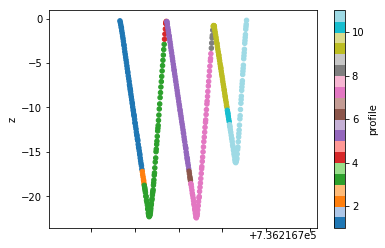

In [4]:
print('Profiles : ', len(profiled_1.profile.unique()))
plot_profiles(profiled_1)

Profiles :  11


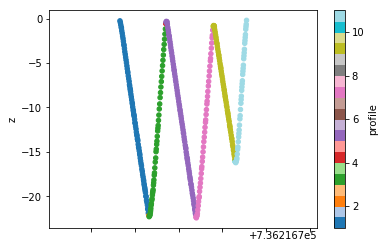

In [5]:
# Shorten the time window for a profile to 2 seconds
profiled_2 = assign_profiles(standard, tsint=2)
print('Profiles : ', len(profiled_2.profile.unique()))
plot_profiles(profiled_2)

## Filter profiles

### Default filters

Filtered out 5 profiles
Profiles :  6


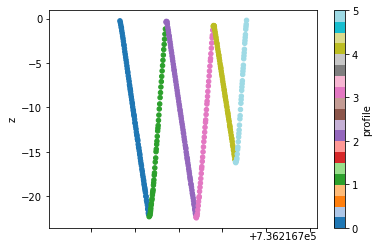

In [6]:
from gutils.filters import default_filter

# Assign default profiles
profiled_def = assign_profiles(standard)

# Default filter
filtered_def, count = default_filter(profiled_def)

print("Filtered out {} profiles".format(count))
print('Profiles : ', len(filtered_def.profile.unique()))
plot_profiles(filtered_def)

### Specify filters

Exclude everything under 20m of depth

['Filtered 7/11 profiles',
 'Depth (2m): 3',
 'Points (20): 2',
 'Time (20s): 0',
 'Distance (18m): 2']
Profiles :  4


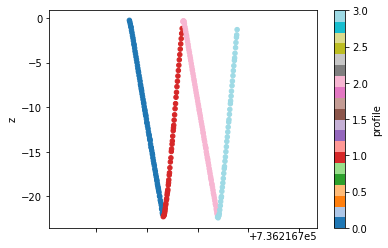

In [7]:
from gutils.filters import (
    filter_profile_depth,
    filter_profile_timeperiod,
    filter_profile_distance,
    filter_profile_number_of_points,
)

profiled_spec = assign_profiles(standard)
original_profiles = len(profiled_spec.profile.unique())

# Filter by Minimum Depth (meters)
below_depth = 2
filtered_spec, rm_depth = filter_profile_depth(profiled_spec, below=below_depth)

# Filter by Numer of Points
num_points = 20
filtered_spec, rm_points = filter_profile_number_of_points(filtered_spec, points_condition=num_points)

# Filter by Lengh of Profile (seconds)
seconds = 20
filtered_spec, rm_time = filter_profile_timeperiod(filtered_spec, timespan_condition=seconds)

# Filter by Vertical Distance
distance = 18
filtered_spec, rm_distance = filter_profile_distance(filtered_spec, distance_condition=distance)

total_filtered = rm_depth + rm_points + rm_time + rm_distance
pprint([
    'Filtered {}/{} profiles'.format(total_filtered, original_profiles),
    'Depth ({}m): {}'.format(below_depth, rm_depth),
    'Points ({}): {}'.format(num_points, rm_points),
    'Time ({}s): {}'.format(seconds, rm_time),
    'Distance ({}m): {}'.format(distance, rm_distance),
])
print('Profiles : ', len(filtered_spec.profile.unique()))
plot_profiles(filtered_spec)

# Play with the data

In [8]:
# Assign default profiles
profiled_play = assign_profiles(standard)

# Default filter
play, count = default_filter(profiled_play)

###  Min/Mean/Max temperature in each profile

In [9]:
import numpy as np

profs = play.groupby('profile')
profs.agg({'temperature': [np.mean, np.max, np.min]})

temperature                  
               mean     amax     amin
profile                              
0.0       27.336434  28.2167  26.2488
1.0       27.096678  27.7972  26.1661
2.0       27.300038  28.1245  26.0981
3.0       27.118583  27.7984  26.0782
4.0       27.451911  28.0767  27.1214
5.0       27.440197  28.3054  27.1198

### Get a Geometry object

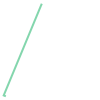

In [10]:
from shapely.geometry import LineString

LineString(zip(play.x, play.y))